In [1]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Libraries imported successfully!")

Matplotlib is building the font cache; this may take a moment.


✅ Libraries imported successfully!


In [2]:
# Cell 2: Load data
df = pd.read_csv('../data/creditcard.csv')
print("✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape}")
print(f"📝 This means: {df.shape[0]:,} transactions and {df.shape[1]} features")
print("\n" + "="*60)
print("First 5 rows of data:")
df.head()

✅ Dataset loaded successfully!
📊 Shape: (284807, 31)
📝 This means: 284,807 transactions and 31 features

First 5 rows of data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Cell 3: Basic information
print("📋 DATASET INFORMATION")
print("="*60)
print(df.info())
print("\n" + "="*60)
print("📊 STATISTICAL SUMMARY")
print("="*60)
print(df.describe())
print("\n" + "="*60)
print("❓ MISSING VALUES CHECK")
print("="*60)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ Great news! No missing values in the dataset!")
else:
    print(missing[missing > 0])

📋 DATASET INFORMATION
<class 'pandas.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21 

In [4]:
# Cell 4: Class distribution
print("💳 CLASS DISTRIBUTION")
print("="*60)
print("\nAbsolute counts:")
print(df['Class'].value_counts())
print("\nPercentages:")
class_dist = df['Class'].value_counts(normalize=True) * 100
print(class_dist)

fraud_count = df['Class'].sum()
normal_count = len(df) - fraud_count
fraud_pct = (fraud_count / len(df)) * 100

print("\n" + "="*60)
print(f"🔍 KEY INSIGHT:")
print(f"   Normal transactions: {normal_count:,} ({100-fraud_pct:.3f}%)")
print(f"   Fraudulent transactions: {fraud_count:,} ({fraud_pct:.3f}%)")
print(f"\n   ⚠️ This is highly imbalanced! Only {fraud_pct:.3f}% are fraud.")
print("="*60)

💳 CLASS DISTRIBUTION

Absolute counts:
Class
0    284315
1       492
Name: count, dtype: int64

Percentages:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

🔍 KEY INSIGHT:
   Normal transactions: 284,315 (99.827%)
   Fraudulent transactions: 492 (0.173%)

   ⚠️ This is highly imbalanced! Only 0.173% are fraud.


✅ Visualization saved: visualizations/class_distribution.png


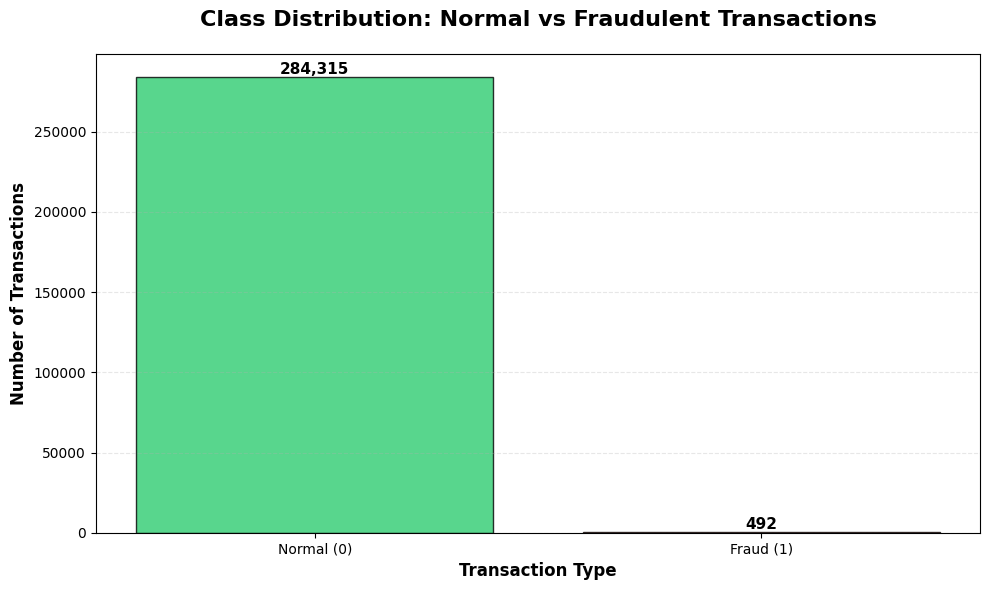

In [5]:
# Cell 5: Visualize class imbalance
plt.figure(figsize=(10, 6))
colors = ['#2ecc71', '#e74c3c']  # Green for normal, red for fraud
bars = plt.bar(['Normal (0)', 'Fraud (1)'], 
               df['Class'].value_counts().values,
               color=colors,
               alpha=0.8,
               edgecolor='black')

plt.title('Class Distribution: Normal vs Fraudulent Transactions', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Number of Transactions', fontsize=12, fontweight='bold')
plt.xlabel('Transaction Type', fontsize=12, fontweight='bold')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('../visualizations/class_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Visualization saved: visualizations/class_distribution.png")
plt.show()

✅ Visualization saved: visualizations/amount_distribution.png


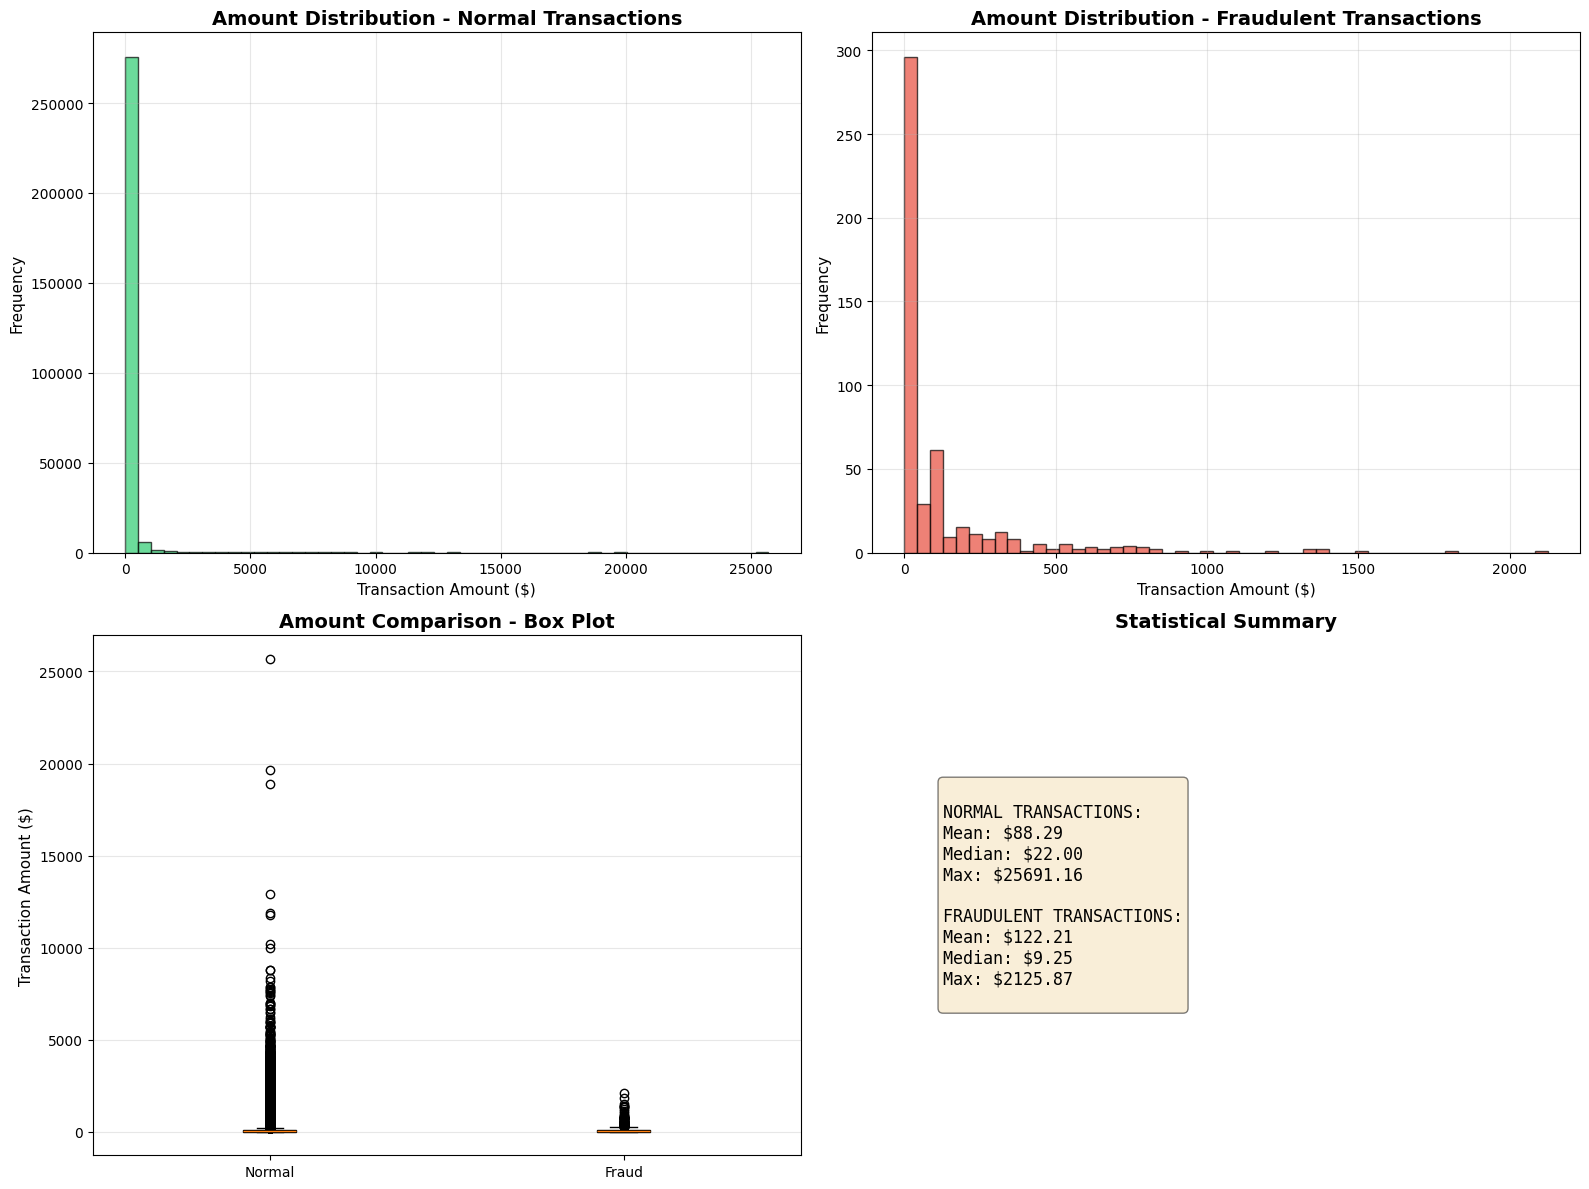


📊 KEY INSIGHTS:
   Normal transactions average: $88.29
   Fraud transactions average: $122.21


In [6]:
# Cell 6: Amount distribution comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top left: Normal transactions amount distribution
axes[0, 0].hist(df[df['Class']==0]['Amount'], bins=50, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Amount Distribution - Normal Transactions', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Transaction Amount ($)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].grid(alpha=0.3)

# Top right: Fraudulent transactions amount distribution
axes[0, 1].hist(df[df['Class']==1]['Amount'], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Amount Distribution - Fraudulent Transactions', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Transaction Amount ($)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].grid(alpha=0.3)

# Bottom left: Box plot comparison
data_to_plot = [df[df['Class']==0]['Amount'], df[df['Class']==1]['Amount']]
bp = axes[1, 0].boxplot(data_to_plot, labels=['Normal', 'Fraud'], patch_artist=True)
bp['boxes'][0].set_facecolor('#2ecc71')
bp['boxes'][1].set_facecolor('#e74c3c')
axes[1, 0].set_title('Amount Comparison - Box Plot', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Transaction Amount ($)', fontsize=11)
axes[1, 0].grid(alpha=0.3, axis='y')

# Bottom right: Statistics
normal_stats = df[df['Class']==0]['Amount'].describe()
fraud_stats = df[df['Class']==1]['Amount'].describe()

stats_text = f"""
NORMAL TRANSACTIONS:
Mean: ${normal_stats['mean']:.2f}
Median: ${normal_stats['50%']:.2f}
Max: ${normal_stats['max']:.2f}

FRAUDULENT TRANSACTIONS:
Mean: ${fraud_stats['mean']:.2f}
Median: ${fraud_stats['50%']:.2f}
Max: ${fraud_stats['max']:.2f}
"""

axes[1, 1].text(0.1, 0.5, stats_text, fontsize=12, family='monospace',
                verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[1, 1].axis('off')
axes[1, 1].set_title('Statistical Summary', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/amount_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Visualization saved: visualizations/amount_distribution.png")
plt.show()

print("\n📊 KEY INSIGHTS:")
print(f"   Normal transactions average: ${normal_stats['mean']:.2f}")
print(f"   Fraud transactions average: ${fraud_stats['mean']:.2f}")

✅ Visualization saved: visualizations/time_distribution.png


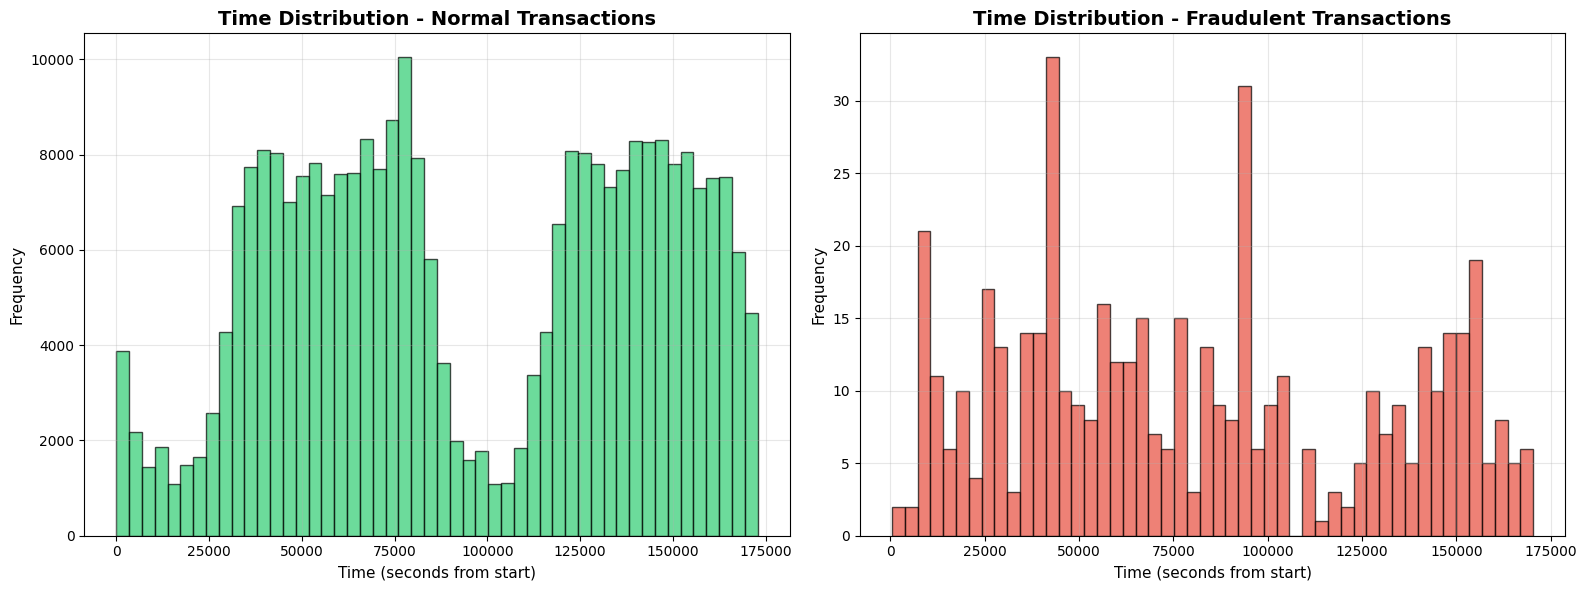

In [7]:
# Cell 7: Time distribution analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Normal transactions
axes[0].hist(df[df['Class']==0]['Time'], bins=50, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0].set_title('Time Distribution - Normal Transactions', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time (seconds from start)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].grid(alpha=0.3)

# Fraudulent transactions
axes[1].hist(df[df['Class']==1]['Time'], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].set_title('Time Distribution - Fraudulent Transactions', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time (seconds from start)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../visualizations/time_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Visualization saved: visualizations/time_distribution.png")
plt.show()

🔍 TOP 15 FEATURES MOST CORRELATED WITH FRAUD:
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
Name: Class, dtype: float64

🔍 BOTTOM 15 FEATURES (NEGATIVELY CORRELATED):
V13    -0.004570
V24    -0.007221
Time   -0.012323
V6     -0.043643
V5     -0.094974
V9     -0.097733
V1     -0.101347
V18    -0.111485
V7     -0.187257
V3     -0.192961
V16    -0.196539
V10    -0.216883
V12    -0.260593
V14    -0.302544
V17    -0.326481
Name: Class, dtype: float64

✅ Visualization saved: visualizations/feature_correlation.png


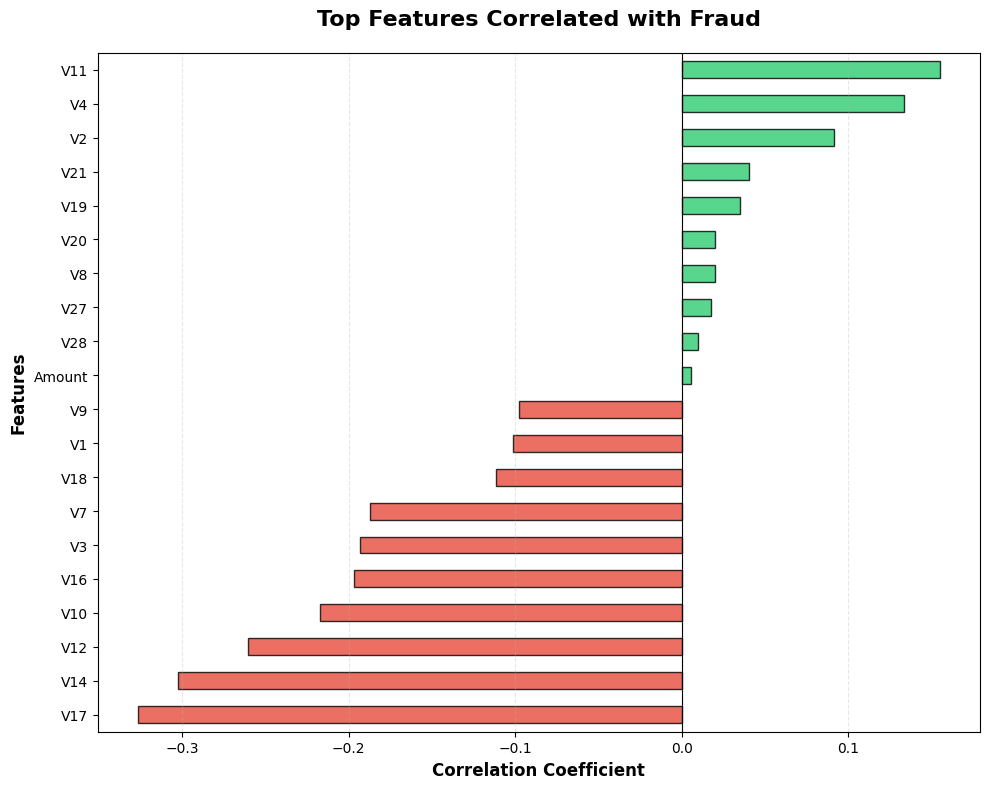


💡 INSIGHT: Features with higher correlation (positive or negative) are more useful for detecting fraud!


In [8]:
# Cell 8: Correlation with fraud
correlations = df.corr()['Class'].sort_values(ascending=False)

print("🔍 TOP 15 FEATURES MOST CORRELATED WITH FRAUD:")
print("="*60)
print(correlations.head(15))

print("\n🔍 BOTTOM 15 FEATURES (NEGATIVELY CORRELATED):")
print("="*60)
print(correlations.tail(15))

# Visualize top correlations
fig, ax = plt.subplots(figsize=(10, 8))

# Get top 10 positive and negative correlations (excluding Class itself)
top_corr = correlations.drop('Class').head(10)
bottom_corr = correlations.drop('Class').tail(10)
combined = pd.concat([top_corr, bottom_corr]).sort_values()

colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in combined.values]
combined.plot(kind='barh', ax=ax, color=colors, edgecolor='black', alpha=0.8)

ax.set_title('Top Features Correlated with Fraud', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
ax.set_ylabel('Features', fontsize=12, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('../visualizations/feature_correlation.png', dpi=300, bbox_inches='tight')
print("\n✅ Visualization saved: visualizations/feature_correlation.png")
plt.show()

print("\n💡 INSIGHT: Features with higher correlation (positive or negative) are more useful for detecting fraud!")